# Air Resistance

In this notebook, you will explore a mathematical model for one-dimensional motion with air resistance.

**If you launch a ball straight upwards with a large initial velocity, does it take longer to travel upward or downward?**

# Introduction

This is an example of *dynamic modeling*. A **dynamic model** is a mathematical description of how a quantity changes in time based on a theory of what factors affect those changes. 

Often a model includes *approximations* (or constraints). And often a model is used to make predictions which are compared to experimental or observational measurements. When a model's predictions agree with measurements, it gives us confidence that we understand the theory the model is based on.

## Example - Vertical Projectile Motion with No Air Resistance

A 0.15 kg baseball is launched upward on Earth with an initial y-velocity of 30 m/s. If there is no air resistance, what is the time to rise to its peak and time to fall?

On Earth, $g=9.8\ \mathrm{N/kg}$, and $F_{net,y}=-mg$. Use a time step of 0.01 s.

First, import a package for graphing.

In [6]:
# import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

Set Jupyter (or colab) to use an interactive graph mode.

In [2]:
%matplotlib notebook

Run the model.

At t = 6.120 s, y = -0.226440.


<IPython.core.display.Javascript object>


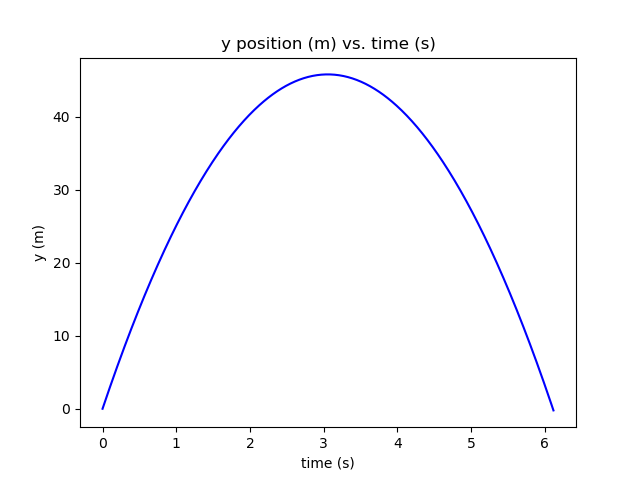

In [4]:
## define constants
m = 0.15 # kg
g = 9.8 # N/kg
dt = 0.01 # s

# define variables and their initial values
v_y = 30 # m/s
y = 0 # m
t = 0 # s

# create empty lists for storing data
tdata = []
ydata = []
vydata = []

# append initial values of t and P to our lists
tdata.append(t)
ydata.append(y)
vydata.append(v_y)

# loop
while y>=0:
    Fnet_y = -m*g
    v_y = v_y + (Fnet_y/m)*dt
    y = y + v_y*dt
    t = t + dt
    
    vydata.append(v_y)
    ydata.append(y)
    tdata.append(t)

# print the final t and y
print("At t = {:.3f} s, y = {:.6f}.".format(t, y))

# plot the calculated data
plt.figure()
plt.title('y position (m) vs. time (s)')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.plot(tdata,ydata,'b-')
plt.show()

## Exercise - Interpreting the Graph

1. For how long does the ball travel upward?

2. For how long does the ball travel downward?

3. What was the ball's maximum height?

## Exercise - Reading the Code

The net force, y-velocity, y-position, and time are updated in each iteration of the loop.

1. There are four *update* equations inside the loop. (I am referring to the equation calculating the net force as an update equation even though the net force on the ball is constant in this example. In general, net force can change, depending on the system.) Which lines are the udpate equations?

2. What caused the loop to stop?

## Exercise - Editing the Code

1. What if you launch it with twice the initial velocity? Does it go twice as high?

2. What if you launch it from an initial height of 50 m, how long does it take to rise and long does it take to fall? Are these times the same?

# Air Resistance (or Drag)

Air resistance on an object is always opposite the object's velocity and is written for one dimensional motion as:

$$F_{air,y} = -\frac{1}{2}\rho A C_d |v_y|v_y$$

The constants are:

- $\rho=1.225$ - mass density of the air in $\mathrm{kg/m^3}$
- $C_d$ - drag coefficient that depends on shape and smoothness. For a sphere it is approximately 0.5.
- $A$ - cross-sectional area. For a sphere, the cross-sectional area is a circle $A=\pi R^2$. A baseball has a diameter of 7.4 cm.

## Exercise - Modify the Mathematical Model

The program below is the same as before, but all of the constants necessary to calculate air resistance have been defined as

```python
rho=1.225 #kg/m^3
Cd=0.3 #drag coeff
R=0.074/2 #radius in m
A = np.pi*R**2 #cross-sectional area of the ball
```

Now, the net force on the baseball should be:

$$F_{net,y} = F_{grav,y} + F_{air,y}$$

$$F_{net,y} = -mg + -\frac{1}{2}\rho A C_d |v_y|v_y$$

Other than defining the constants above (like density of air, etc.), we should only have to edit one line in our program to add air resistance. **This is the beauty of modeling.** We can explore more complex motion, but the mathematics (compute net force, update velocity, update position) does not change.

At t = 5.520 s, y = -0.101147.


<IPython.core.display.Javascript object>


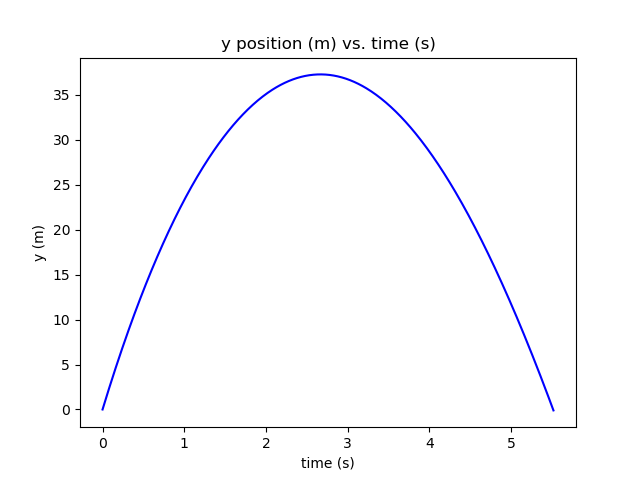

In [9]:
## define constants
m = 0.15 # kg
g = 9.8 # N/kg
dt = 0.01 # s

rho=1.225 #kg/m^3
Cd=0.3 #drag coeff
R=0.074/2 #radius in m
A = np.pi*R**2 #cross-sectional area of the ball

# define variables and their initial values
v_y = 30 # m/s
y = 0 # m
t = 0 # s

# create empty lists for storing data
tdata = []
ydata = []
vydata = []

# append initial values of t and P to our lists
tdata.append(t)
ydata.append(y)
vydata.append(v_y)

# loop
while y>=0:
    Fnet_y = -m*g - 1/2*rho*A*Cd*np.abs(v_y)*v_y
    v_y = v_y + (Fnet_y/m)*dt
    y = y + v_y*dt
    t = t + dt
    
    vydata.append(v_y)
    ydata.append(y)
    tdata.append(t)

# print the final t and y
print("At t = {:.3f} s, y = {:.6f}.".format(t, y))

# plot the calculated data
plt.figure()
plt.title('y position (m) vs. time (s)')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.plot(tdata,ydata,'b-')
plt.show()

# Your Answer to the Initial Question

If you launch a ball straight upwards with a large initial velocity, does it take longer to travel upward or downward?

# Review of One Dimensional Motion

According to Newton's second law, the change in velocity of an object is proportonal to the net force per unit mass of the object. Here we write it for one dimensional motion in the $y$ direction which could be horizontal or vertical. You could just as well call it the $x$ direction if you prefer.

$$\Delta v_y = \left(\frac{F_{net,y}}{m}\right)\Delta t$$

where the **net force** $F_{net,y}$ is the sum of all the forces on the object in the $y$ direction.

The **time rate of change** of the y-velocity is defined as the y-acceleration:

$$\mathrm{rate\ of\ change}= \dot{v}_y = \frac{\Delta v_y}{\Delta t} = \left(\frac{F_{net,y}}{m}\right)$$

Thus, the greater the force or smaller the mass, the faster the velocity increases. This can be used to predict the future y-velocity. The future y-velocity at the end of a time step $\Delta t$ is 

$$v_{y,future} = v_{y,now} + \dot{v}_{y,now}\Delta t$$

or in terms of the net force on the object

$$v_{y,future} = v_{y,now} + \left(\frac{F_{net,y}}{m}\right)\Delta t$$

The y-position also changes, and the rate of change of the position is the velocity. Use the future y-velocity to update the y-position. 

$$y_{future} = y_{now} + v_{y,future}\Delta t$$


## Summary of Update Equations

Here are the *update* equations to be calculated in each time step.

1. Update $\vec{F}_{net,y}$.
2. Update $v_y$.
3. Update $y$.

The equations look like this:

$$F_{net,y}= ...$$
$$v_{y,future} = v_{y,now} + \left(\frac{F_{net,y}}{m}\right)\Delta t$$
$$y_{future} = y_{now} + v_{y,future}\Delta t$$

The lines of code would look like this:

```python
Fnet_y = ###
v_y = v_y + F_nety*dt
y = y + v_y*dt
```

The details for `Fnet_y` depend on your particular model.